In [67]:
from glob import glob 
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imageio

input_dataset_path = './Data/Original/'
output_dataset_path = './Data/Output/'

./Data/Original/GT/1001-19-49-28.653.png
./Data/Original/metalens/1001-19-49-28.601.png
1136 1936


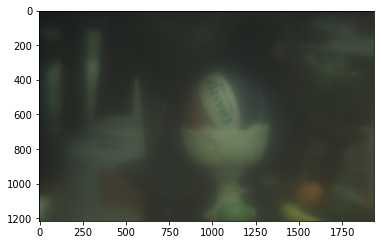

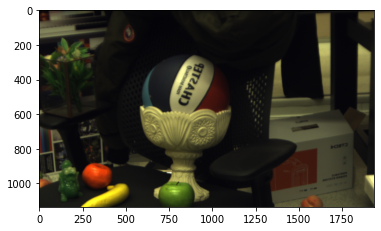

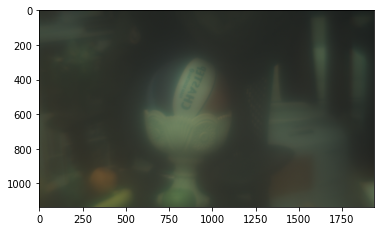

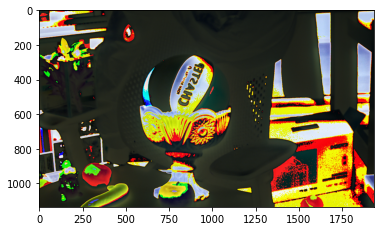

In [81]:
gt_path_list = sorted(glob(input_dataset_path+'GT/*'))
meta_path_list = sorted(glob(input_dataset_path+'metalens/*'))
print(gt_path_list[0])
print(meta_path_list[0])

def cvt_raw2rgb(img_path):
    imageRaw = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE | cv2.IMREAD_ANYDEPTH)
    img_bgr = cv2.cvtColor(imageRaw, cv2.COLOR_BAYER_BG2BGR)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    return img_rgb

img_gt = cvt_raw2rgb(meta_path_list[0])
plt.imshow(img_gt)


def images_alignment(img_gt,img_meta):
    img_meta = np.fliplr(img_meta)
    # Crop FoV
    img_gt = img_gt[200:920,55:1200]
    img_meta = img_meta[80:,:]
    # Match GT size to Meta
    w,h,c = img_meta.shape
    #print(w,h)
    img_gt = cv2.resize(img_gt,(h,w))
    return img_gt, img_meta

i = 0
img_gt = cvt_raw2rgb(gt_path_list[i])
img_meta = cvt_raw2rgb(meta_path_list[i])
img_gt,img_meta = images_alignment(img_gt,img_meta)
plt.figure()
plt.imshow(img_gt)
plt.figure()
plt.imshow(img_meta)
plt.figure()
plt.imshow(img_meta-img_gt)

In [83]:
def generate_dataset(input_dataset_path,output_dataset_path):
    gt_path_list = sorted(glob(input_dataset_path+'GT/*'))
    meta_path_list = sorted(glob(input_dataset_path+'metalens/*'))
    for i in range(0,len(gt_path_list)):
        print(i)
        img_gt = cvt_raw2rgb(gt_path_list[i])
        img_meta = cvt_raw2rgb(meta_path_list[i])
        img_gt,img_meta = images_alignment(img_gt,img_meta)
        imageio.imwrite(output_dataset_path+"GT/{}.png".format(i), np.uint8(img_gt))
        imageio.imwrite(output_dataset_path+"metalens/{}.png".format(i), np.uint8(img_meta))

generate_dataset(input_dataset_path,output_dataset_path)

UnboundLocalError: local variable 'i' referenced before assignment